# Прикладные дифференциальные уравнения
## Занятие 8
*Илья Щуров*

Факультет компьютерных наук, Прикладная математики и информатика, 2021-22 учебный год

[Страница курса](http://math-info.hse.ru/2021-22/Прикладные_дифференциальные_уравнения)

## Система Лоренца

$$
\begin{align}
\frac{\mathrm{d}x}{\mathrm{d}t} &= \sigma (y - x), \\[6pt]
\frac{\mathrm{d}y}{\mathrm{d}t} &= x (\rho - z) - y, \\[6pt]
\frac{\mathrm{d}z}{\mathrm{d}t} &= x y - \beta z.
\end{align}
$$

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

%matplotlib inline

In [3]:
def lorentz(X, t, sigma, rho, beta):
    x, y, z = X
    return np.array([sigma * (y - x), x * (rho - z) - y, x * y - beta * z])

In [4]:
trajectory1 = odeint(
    lorentz, np.array([1, 2, 3]), np.linspace(0, 30, 3000), args=(10, 28, 8.1 / 3)
)
trajectory2 = odeint(
    lorentz, np.array([10, 2, 3]), np.linspace(0, 30, 3000), args=(10, 28, 8.1 / 3)
)

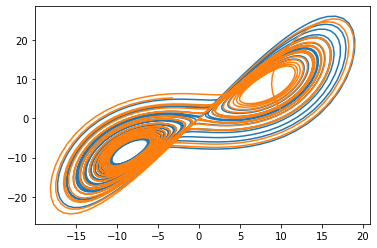

In [8]:
plt.plot(trajectory1[:, 0], trajectory1[:, 1])
plt.plot(trajectory2[:, 0], trajectory2[:, 1])

In [9]:
import plotly.graph_objects as go

In [10]:
go.Figure(
    [
        go.Scatter3d(
            x=trajectory1[:, 0], y=trajectory1[:, 1], z=trajectory1[:, 2], mode="lines"
        ),
        go.Scatter3d(
            x=trajectory2[:, 0], y=trajectory2[:, 1], z=trajectory2[:, 2], mode="lines"
        ),
    ]
)

In [ ]:
go.Figure(
    [
        #         go.Scatter3d(
        #             x=trajectory2[:, 0], y=trajectory2[:, 1], z=trajectory2[:, 2], mode="lines"
        #         ),
        go.Scatter3d(
            x=trajectory2[:, 0], y=trajectory2[:, 1], z=trajectory2[:, 2], mode="lines"
        ),
    ],
    layout=go.Layout(
        scene=go.layout.Scene(
            xaxis=dict(range=[-25, 25], autorange=False, zeroline=False),
            yaxis=dict(range=[-25, 25], autorange=False, zeroline=False),
            zaxis=dict(range=[0, 50], autorange=False, zeroline=False),
        ),
        width=1000,
        height=1200,
        # title_text="Kinematic Generation of a Planar Curve", hovermode="closest",
        updatemenus=[
            dict(
                type="buttons",
                buttons=[
                    {
                        "args": [
                            None,
                            {
                                "frame": {"duration": 50, "redraw": True},
                                "fromcurrent": True,
                                "transition": {"duration": 50},
                            },
                        ],
                        "label": "Play",
                        "method": "animate",
                    },
                    {
                        "args": [
                            [None],
                            {
                                "frame": {"duration": 0, "redraw": False},
                                "mode": "immediate",
                                "transition": {"duration": 0},
                            },
                        ],
                        "label": "Pause",
                        "method": "animate",
                    },
                ],
            )
        ],
    ),
    frames=[
        go.Frame(
            data=[
                go.Scatter3d(
                    x=trajectory2[:k, 0],
                    y=trajectory2[:k, 1],
                    z=trajectory2[:k, 2],
                    mode="lines",
                    marker=dict(color="blue", size=4),
                )
            ]
        )
        for k in range(0, len(trajectory2), 10)
    ],
)